In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
from control import bode, tf, hinfsyn
from control.matlab import logspace, feedback, step, nyquist, ss

from for_plot import bodeplot_set, plot_set

In [2]:
m1 = 0.8
m2 = 0.2
k1 = 100
k2 = 300 #np.random.rand(1, 300)*120 + np.ones([1,300])*240
c1 = 1
c2 = 0.3
Ks = 100
M = np.matrix([[m1 , 0],[0, m2]])
C = np.matrix([[c1 + c2, -c2],[-c2, c2]])
K = np.matrix([[k1 + k2, -k2],[-k2, k2]])
F = np.matrix([[Ks, 0]]).T

In [3]:
iM = np.linalg.inv(M)
Ap = np.array([[0,0,1,0],[0,0,0,1]])
Ap_ = np.concatenate([-iM*K, -iM*C], 1)
Ap = np.concatenate([Ap, Ap_])

In [4]:
Bp = np.concatenate([np.zeros([2,1]),iM*F])

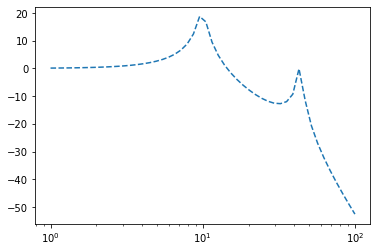

In [5]:
Cp = np.matrix([[0,1,0,0]])
Dp = 0
P = ss(Ap, Bp, Cp, Dp)
plt.figure(1)
mag, phase, om = bode( P , logspace(0,2), plot=False )
plt.semilogx( om, 20*np.log10(mag), '--' )

In [6]:
def Ap_f(k2_):
    K_ = np.matrix([[k1 + k2_, -k2_],[-k2_, k2_]])
    Ap_temp = np.array([[0,0,1,0],[0,0,0,1]])
    Ap_temp_ = np.concatenate([-iM*K_, -iM*C], 1)
    Ap_f = np.concatenate([Ap_temp, Ap_temp_])
    return Ap_f

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureW

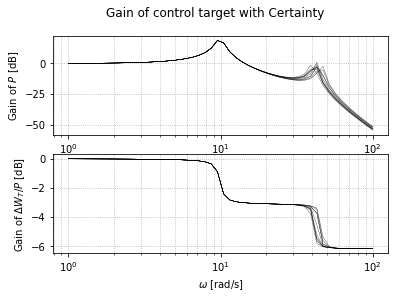

In [7]:
k2_list = np.random.rand(10)*120 + np.ones(10)*240
fig, ax = plt.subplots(2, 1)

for k2 in k2_list:
    #不確かさをもつ制御対象
    Ap_temp = Ap_f(k2)
    P = ss(Ap_temp, Bp, Cp, Dp)
    gain, _, w = bode(P, logspace(0, 2), Plot = False)
    ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
    gain, _, w = bode(P, logspace(0, 2), Plot = False)
    ax[1].semilogx(w, _, color='k', lw=0.3)   
bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Gain of $\Delta W_T/P$ [dB]')

fig.suptitle("Gain of control target with Certainty")
plt.show()

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\freqplot.py:185: FutureW

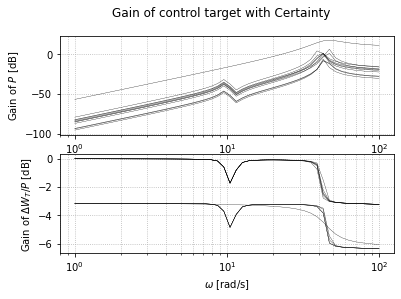

In [8]:
# 4.2
Ap_temp = Ap_f(300)
P_nominal = ss(Ap_temp, Bp, Cp, Dp)
P_nominal = ss2tf(P_nominal)
s =tf('s')
Wm = 3*s**2/(s**2 + 18*s+45**2)
fig, ax = plt.subplots(2, 1)
for k2 in k2_list:
    #不確かさをもつ制御対象
    Ap_temp = Ap_f(k2)
    P_ = ss(Ap_temp, Bp, Cp, Dp)
    P_ = ss2tf(P_)
    Dm = (P_-P_nominal)/P_nominal
    gain, _, w = bode(Dm, logspace(0, 2), Plot = False)
    ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
    ax[1].semilogx(w, _, color='k', lw=0.3)   
gain, _, w = bode(Wm, logspace(0, 2), Plot = False)
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=0.3)    
ax[1].semilogx(w, _, color='k', lw=0.3)   
bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $P$ [dB]')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Gain of $\Delta W_T/P$ [dB]')
fig.suptitle("Gain of control target with Certainty")
plt.show()

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\scipy\signal\_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


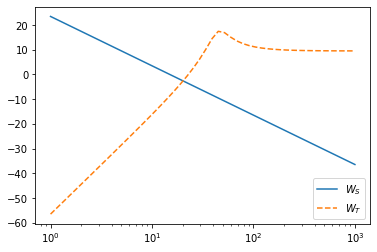

In [9]:
# 行列で伝達関数を定義して、それをtf2ssで状態空間モデルにする

#%% defgp.m
#%% 重み関数の定義
s = tf('s');
Ws = 15/(s + 1.5e-2); #% Ws
Wt = Wm;              #% Wt
Weps = 5e-4;          #% Weps

plt.figure(3)
#bodemag(Ws,Wt,'--',w);
mag, phase, om  = bode(Ws, logspace(0,3), plot=False);
mag2,phase2,om2 = bode(Wt, logspace(0,3), plot=False);
plt.semilogx(om,  20*np.log10(mag), label='$W_S$');
plt.semilogx(om2, 20*np.log10(mag2), '--', label='$W_T$');
#legend('Ws','Wt',4);
plt.legend()

num = [[Ws.num[0][0],    [0], (-Ws).num[0][0]], 
       [         [0],    [0],    Wt.num[0][0]],
       [P_nominal.num[0][0], [Weps], (-P_nominal).num[0][0]]]
den = [[Ws.den[0][0],    [1], (-Ws).den[0][0]], 
       [         [1],    [1],    Wt.den[0][0]],
       [P_nominal.den[0][0],    [1], (-P_nominal).den[0][0]]]
G_ = tf(num, den)
G = tf2ss(G_)


In [10]:
s = tf('s');
Ws = 15/(s + 1.5e-2); #% Ws

0.967532416344875


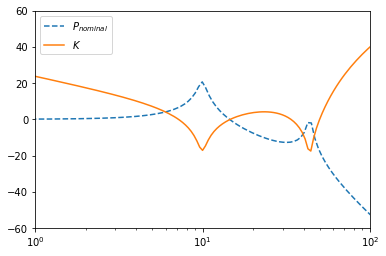

In [11]:
K, CL, gam, rcond = hinfsyn(G,1,1)
print( gam )

plt.figure(4)
mag1, phase1, om1 = bode( P_nominal, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$P_{nominal}$' );
mag2, phase2, om2 = bode( K, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$K$' );
plt.ylim(-60, 60);
plt.xlim(1e0, 1e2);
plt.legend()

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\numpy\lib\polynomial.py:779: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\numpy\lib\polynomial.py:779: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\xferfcn.py:386: RuntimeWarning: underflow encountered in true_divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /
C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\control\xferfcn.py:386: RuntimeWarning: invalid value encountered in true_divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /
C:\Users\takahashi\AppData\Local\Temp\ipykernel_4048\81600793.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx( om1, 20*np.log10(mag1), '--', label='$T$' );


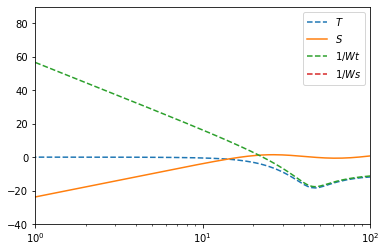

In [12]:
K = ss2tf(K)
T = P_nominal*K/(1+P_nominal*K)
S = 1/(1+P_nominal*K)
plt.figure(5)
mag1, phase1, om1 = bode( T, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$T$' );
mag2, phase2, om2 = bode( S, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$S$' );
mag1, phase1, om1 = bode( 1/Wt, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$1/Wt$' );
mag2, phase2, om2 = bode(1/Ws, plot=False )
plt.semilogx( om2, 20*np.log10(mag2), '--', label='$1/Ws$')
plt.ylim(-40, 90)
plt.xlim(1e0, 1e2)
plt.legend()

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\scipy\signal\_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


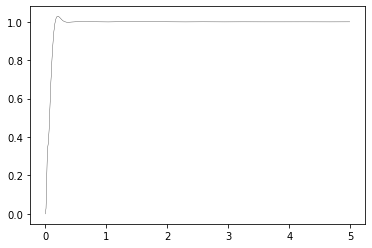

In [13]:
fig, ax = plt.subplots()
Gyr = feedback(tf2ss(P_nominal)*K, 1)
ref = 1      #目標値30
y, t = step(Gyr, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='k', lw=0.3)

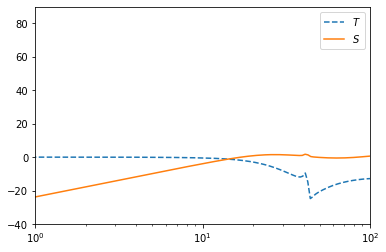

In [14]:
L =P*K
T = feedback(L,1)
S = feedback(1, L)
M = feedback(P, K)
plt.figure(5)
mag1, phase1, om1 = bode( T, plot=False );
plt.semilogx( om1, 20*np.log10(mag1), '--', label='$T$' );
mag2, phase2, om2 = bode( S, plot=False );
plt.semilogx( om2, 20*np.log10(mag2), label='$S$' );
plt.ylim(-40, 90)
plt.xlim(1e0, 1e2)
plt.legend()

C:\Users\takahashi\anaconda3\envs\control\lib\site-packages\scipy\signal\_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


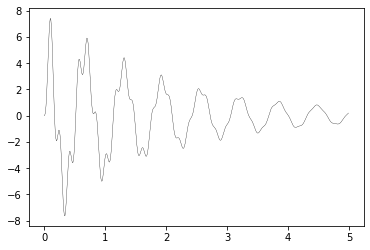

In [15]:
fig, ax = plt.subplots()
Gyr = feedback(tf2ss(P_nominal)*K, 1)
ref = 1      #目標値30
y, t = impulse(M, np.arange(0, 5, 0.01))
ax.plot(t, y*ref, color='k', lw=0.3)